# First steps and exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl

## Exploring train_events.csv

In [2]:
path = 'data/train_events.csv'
log = pl.read_csv(path)

In [3]:
log.head()

series_id,night,event,step,timestamp
str,i64,str,i64,str
"""038441c925bb""",1,"""onset""",4992,"""2018-08-14T22:…"
"""038441c925bb""",1,"""wakeup""",10932,"""2018-08-15T06:…"
"""038441c925bb""",2,"""onset""",20244,"""2018-08-15T19:…"
"""038441c925bb""",2,"""wakeup""",27492,"""2018-08-16T05:…"
"""038441c925bb""",3,"""onset""",39996,"""2018-08-16T23:…"


In [4]:
log.describe()

describe,series_id,night,event,step,timestamp
str,str,f64,str,f64,str
"""count""","""14508""",14508.0,"""14508""",14508.0,"""14508"""
"""null_count""","""0""",0.0,"""0""",4923.0,"""4923"""
"""mean""",null,15.120072,null,214352.123944,null
"""std""",null,10.286758,null,141268.408192,null
"""min""","""038441c925bb""",1.0,"""onset""",936.0,"""2017-08-05T22:…"
"""25%""",null,7.0,null,95436.0,null
"""50%""",null,14.0,null,200604.0,null
"""75%""",null,21.0,null,317520.0,null
"""max""","""fe90110788d2""",84.0,"""wakeup""",739392.0,"""2019-07-05T05:…"


## Exploring train_series.parquet

In [5]:
# read the parquet file
df = pl.read_parquet('data/train_series.parquet')

In [6]:
df.head()

series_id,step,timestamp,anglez,enmo
str,u32,str,f32,f32
"""038441c925bb""",0,"""2018-08-14T15:…",2.6367,0.0217
"""038441c925bb""",1,"""2018-08-14T15:…",2.6368,0.0215
"""038441c925bb""",2,"""2018-08-14T15:…",2.637,0.0216
"""038441c925bb""",3,"""2018-08-14T15:…",2.6368,0.0213
"""038441c925bb""",4,"""2018-08-14T15:…",2.6368,0.0215


In [18]:
# print the series_id
print("Number of different series_id : ", df['series_id'].unique().shape[0])

Number of different series_id :  277


In [37]:
# Verify if all the series have the same number of steps
series_steps = df.groupby('series_id').agg(pl.count('timestamp').alias('steps'))
series_steps.head()

C:\Users\magal\AppData\Local\Temp\ipykernel_476\1344499321.py:2: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  series_steps = df.groupby('series_id').agg(pl.count('timestamp').alias('steps'))


series_id,steps
str,u32
"""0cd1e3d0ed95""",370260
"""1087d7b0ff2e""",410940
"""1d4569cbac0f""",603900
"""361366da569e""",348840
"""9ddd40f2cb36""",413820


Exploration of one series of the dataset

In [20]:
# select one series_id and plot it
series_id = "038441c925bb"
df_one_serie = df.filter(df['series_id'] == series_id)

In [24]:
df_one_serie.shape

(389880, 5)

In [36]:
print("Number of different steps for the series_id {} : {}".format(series_id, df_one_serie['timestamp'].unique().shape[0]))

Number of different steps for the series_id 038441c925bb : 389880


Text(0, 0.5, 'angle_z')

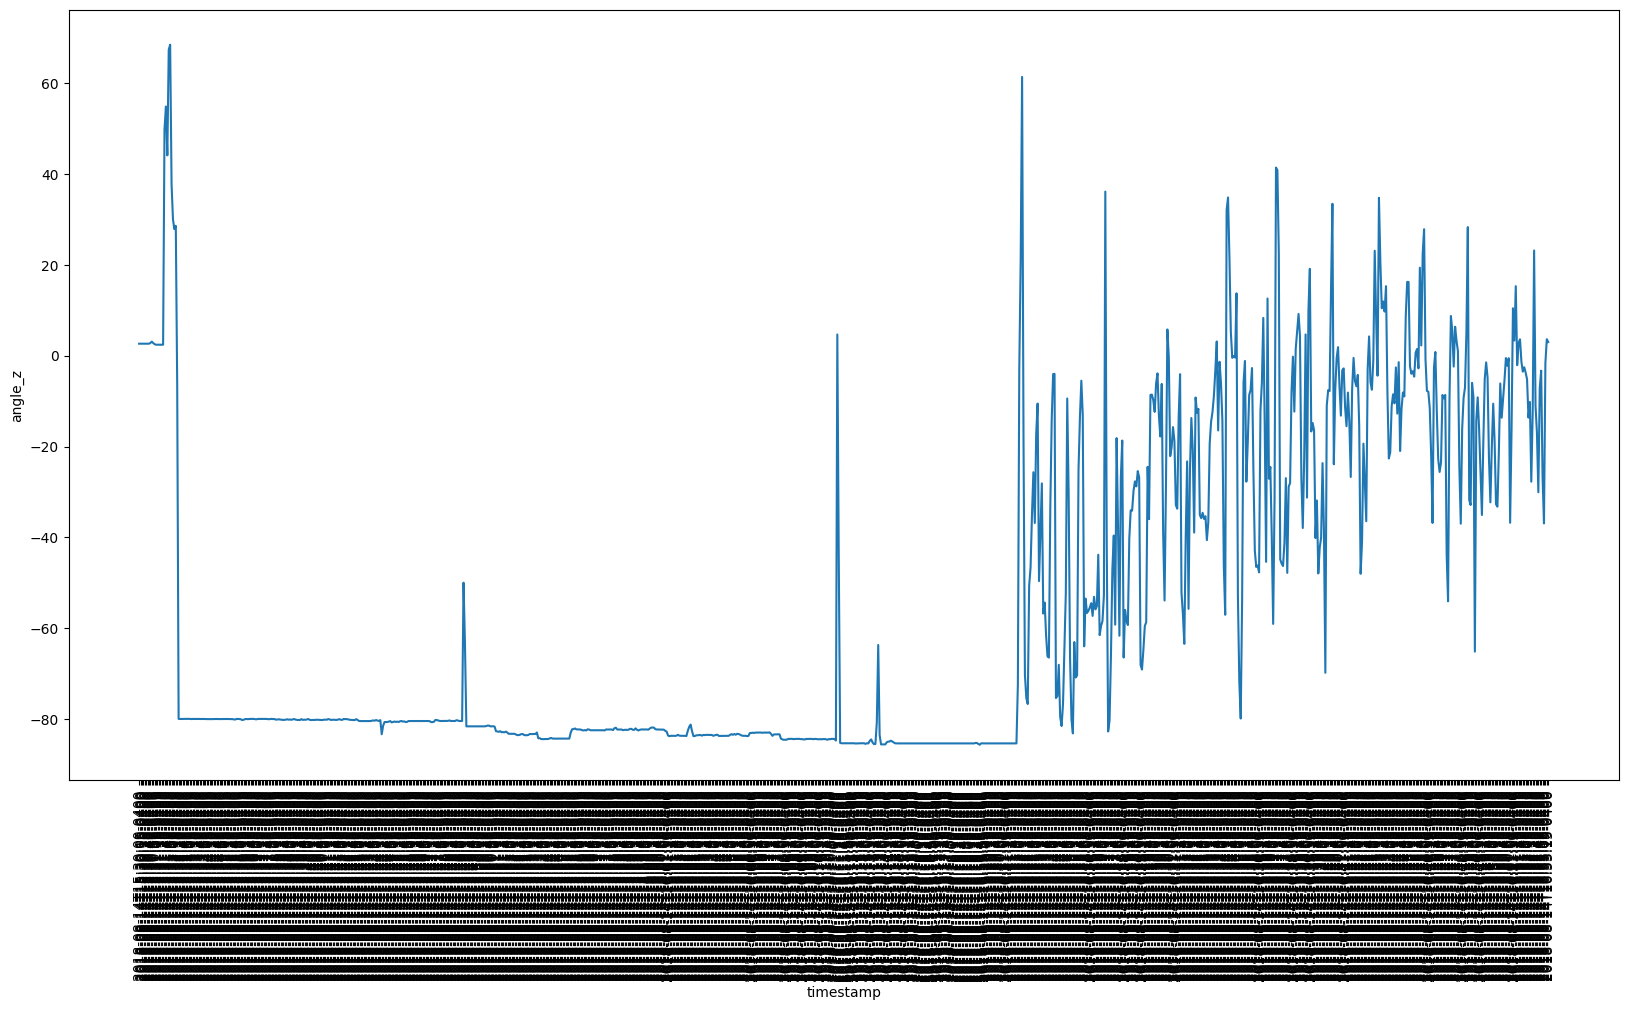

In [31]:
# plot the anglez of the df_one_serie dataframe versus the timestamp for 1000 first rows
plt.figure(figsize=(20, 10))
plt.plot(df_one_serie['timestamp'][:1000], df_one_serie['anglez'][:1000])
plt.ylabel('angle_z')
plt.title('angle_z versus timestamp')

Text(0.5, 1.0, 'enmo versus timestamp')

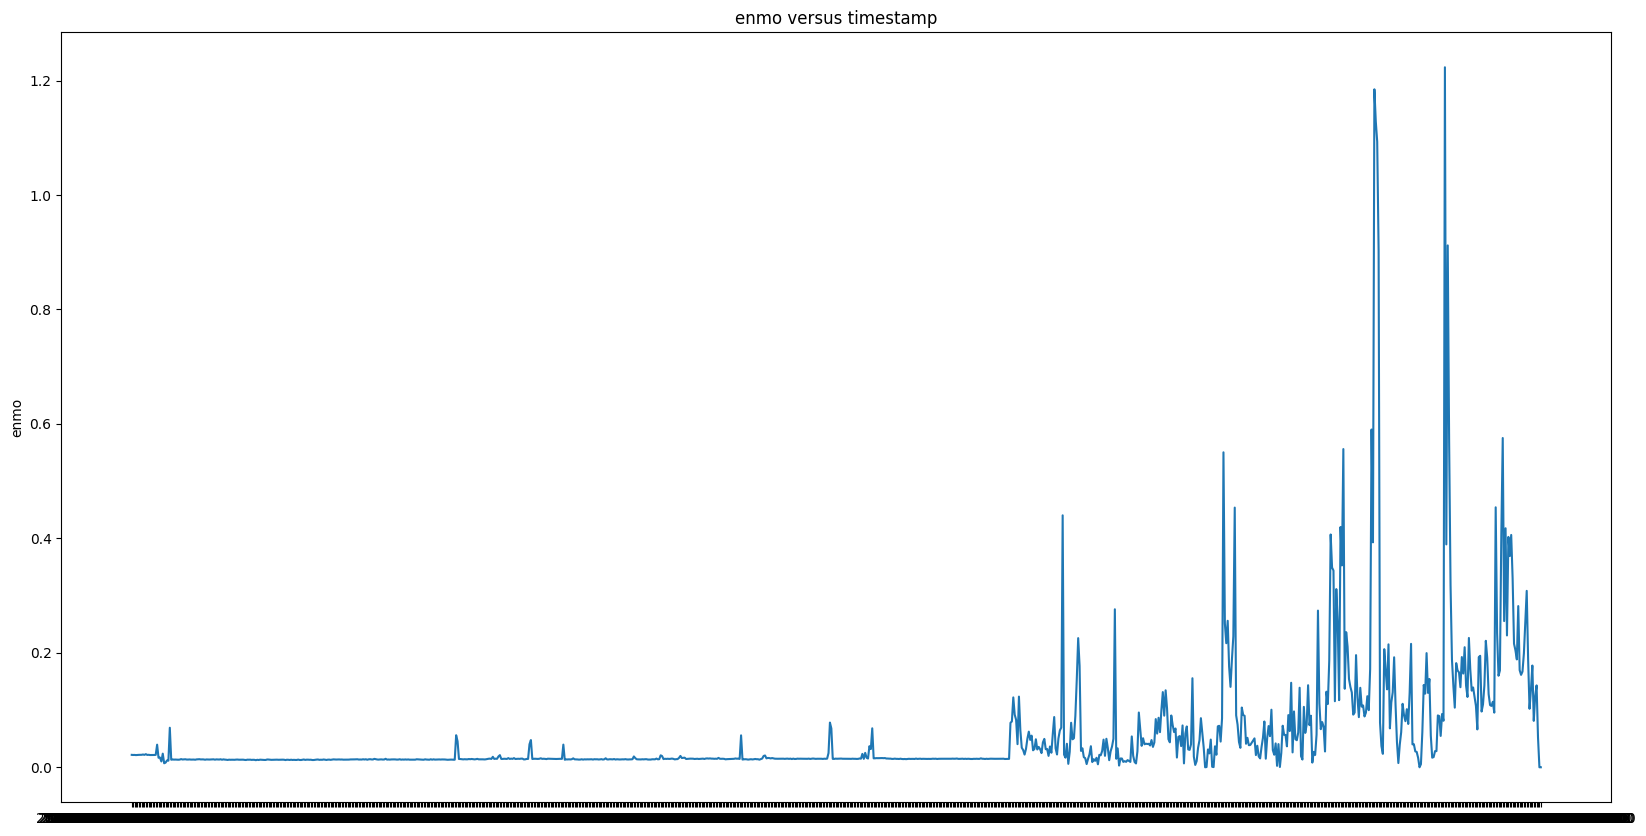

In [32]:
# plot the enmo of the df_one_serie dataframe versus the timestamp for 1000 first rows
plt.figure(figsize=(20, 10))
plt.plot(df_one_serie['timestamp'][:1000], df_one_serie['enmo'][:1000])
plt.ylabel('enmo')
plt.title('enmo versus timestamp')

Creating a validation set

In [35]:
log.shape

(14508, 5)

In [44]:
# create a new dataframe by assembling log and df by the series_id and step columns
df_validation = df.join(log, on=['series_id', 'timestamp'], how='inner')

In [45]:
df_validation.head()

series_id,step,timestamp,anglez,enmo,night,event,step_right
str,u32,str,f32,f32,i64,str,i64
"""038441c925bb""",4992,"""2018-08-14T22:…",-78.690598,0.0099,1,"""onset""",4992
"""038441c925bb""",10932,"""2018-08-15T06:…",-61.578201,0.0263,1,"""wakeup""",10932
"""038441c925bb""",20244,"""2018-08-15T19:…",-6.3874,0.0182,2,"""onset""",20244
"""038441c925bb""",27492,"""2018-08-16T05:…",-45.355099,0.0165,2,"""wakeup""",27492
"""038441c925bb""",39996,"""2018-08-16T23:…",-1.7867,0.0,3,"""onset""",39996


In [52]:
# encode the event column so it can be used as color in the plot
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
events_encoded = le.fit_transform(df_validation['event']).tolist()

Text(0.5, 1.0, 'angle_z versus timestamp')

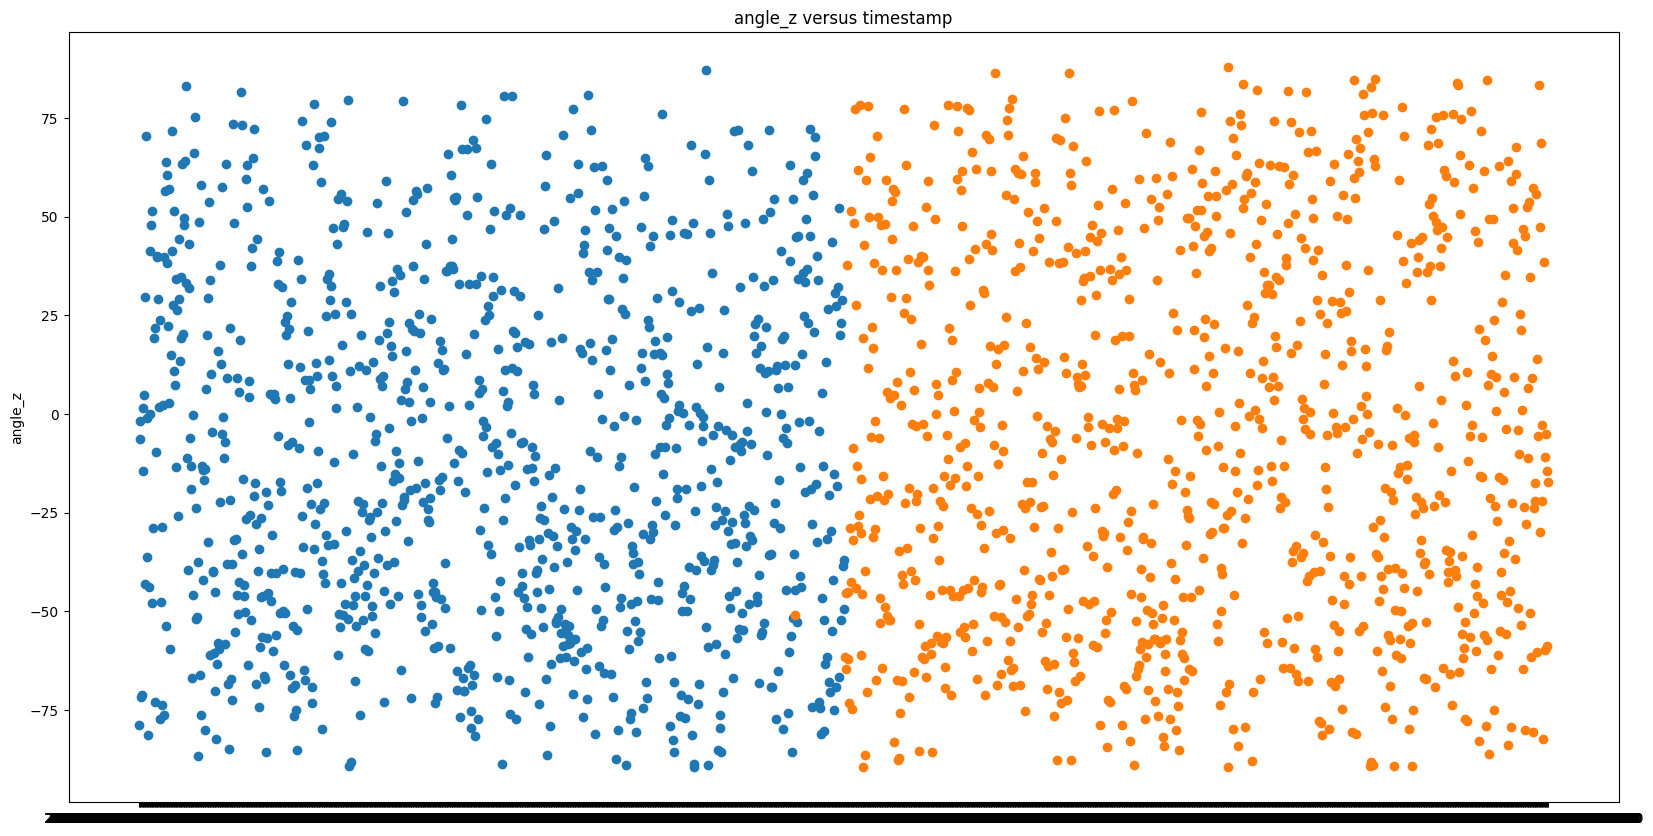

In [56]:
# plot the anglez of the df_validation dataframe versus the timestamp for 1000 first rows and colored by event
plt.figure(figsize=(20, 10))

for event in df_validation['event'].unique():
    df_event = df_validation.filter(df_validation['event'] == event)
    plt.scatter(df_event['timestamp'][:1000], df_event['anglez'][:1000], label=event)

plt.ylabel('angle_z')
plt.title('angle_z versus timestamp')